In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro, kstest

df=pd.read_csv('insurance-claim-analysis-demographic-and-health/insurance_data.csv')
df=df.drop(columns=["index"])
df=df.dropna()

sns.set_style('darkgrid')


Kendall Correlation Matrix:
                    age       bmi  bloodpressure     claim
age            1.000000 -0.029220      -0.054946 -0.006987
bmi           -0.029220  1.000000       0.080792  0.085866
bloodpressure -0.054946  0.080792       1.000000  0.259979
claim         -0.006987  0.085866       0.259979  1.000000


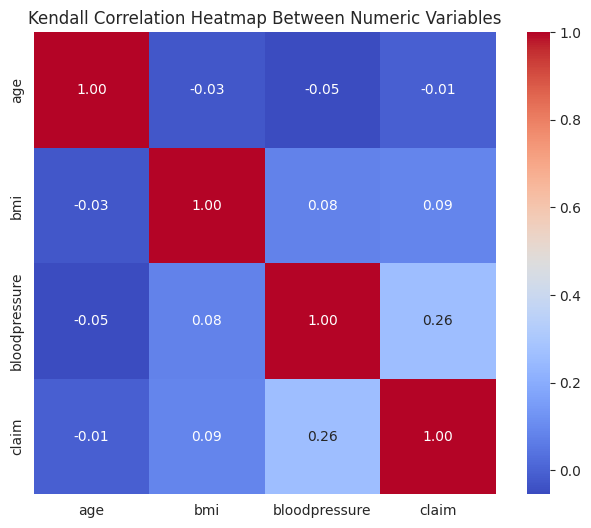


Spearman Correlation Matrix:
                    age       bmi  bloodpressure     claim
age            1.000000 -0.043098      -0.080138 -0.010263
bmi           -0.043098  1.000000       0.118354  0.123919
bloodpressure -0.080138  0.118354       1.000000  0.372100
claim         -0.010263  0.123919       0.372100  1.000000


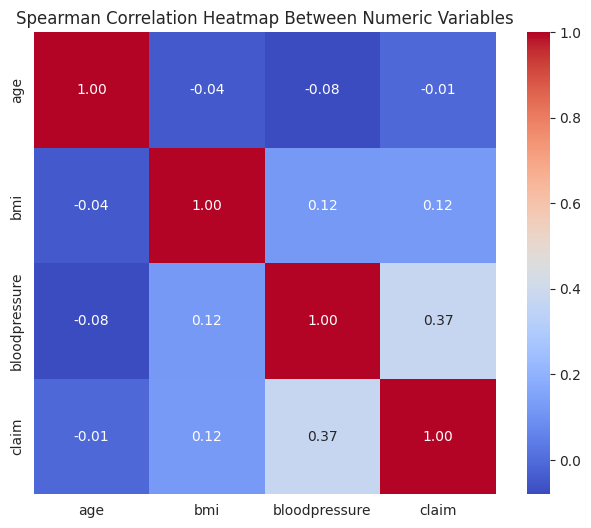


Interpretation Hints:
- Kendall and Spearman correlations assess monotonic relationships (not just linear).
- Values closer to 1 or -1 indicate strong monotonic relationships (positive or negative).
- Values near 0 indicate little to no monotonic relationship between the features.


In [22]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant numeric features for correlation analysis
numeric_features = ['age', 'bmi', 'bloodpressure', 'claim']

# Calculate Kendall correlation matrix
kendall_corr = df[numeric_features].corr(method='kendall')
print("\nKendall Correlation Matrix:")
print(kendall_corr)

# Visualize the Kendall correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Kendall Correlation Heatmap Between Numeric Variables")
plt.show()

# Calculate Spearman correlation matrix
spearman_corr = df[numeric_features].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Visualize the Spearman correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Spearman Correlation Heatmap Between Numeric Variables")
plt.show()

# Interpretation Hints
print("\nInterpretation Hints:")
print("- Kendall and Spearman correlations assess monotonic relationships (not just linear).")
print("- Values closer to 1 or -1 indicate strong monotonic relationships (positive or negative).")
print("- Values near 0 indicate little to no monotonic relationship between the features.")




Missing Values in 'gender_numeric': 0

Summary Statistics:

Summary Statistics for 'bmi' by Gender:
        count       mean       std   min   25%   50%     75%   max
gender                                                            
female  662.0  30.379758  6.046508  16.8  26.1  30.1  34.300  48.1
male    670.0  30.933582  6.181910  16.0  26.4  30.7  35.175  53.1

Summary Statistics for 'bloodpressure' by Gender:
        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  662.0  94.013595  11.203446  80.0  86.0  93.0  99.0  140.0
male    670.0  94.362687  11.684880  80.0  86.0  92.0  99.0  140.0

Summary Statistics for 'claim' by Gender:
        count          mean           std      min        25%       50%  \
gender                                                                    
female  662.0  12569.578897  11128.703817  1607.51  4885.1625  9412.965   
male    670.0  14071.891060  12971.546624  1

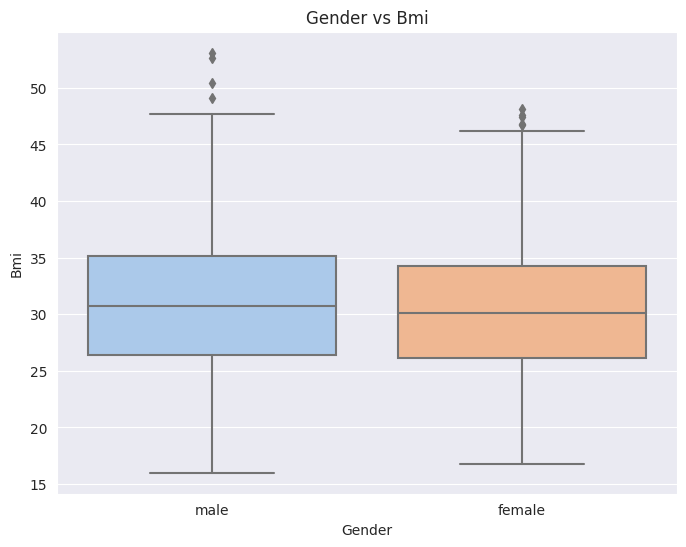

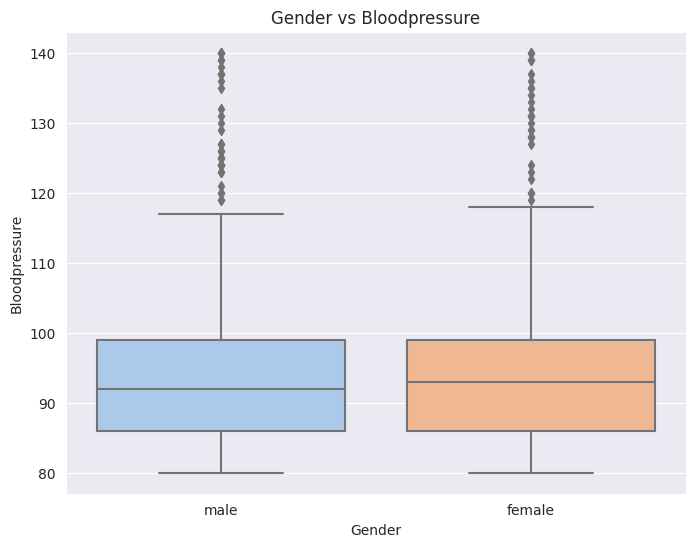

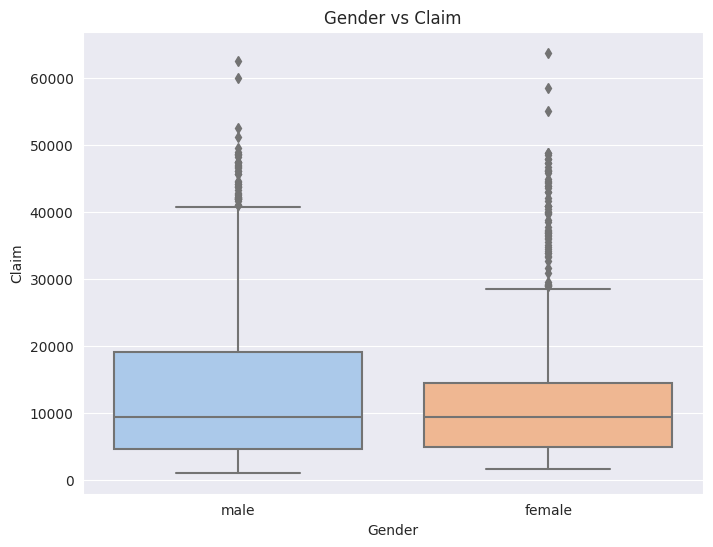

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


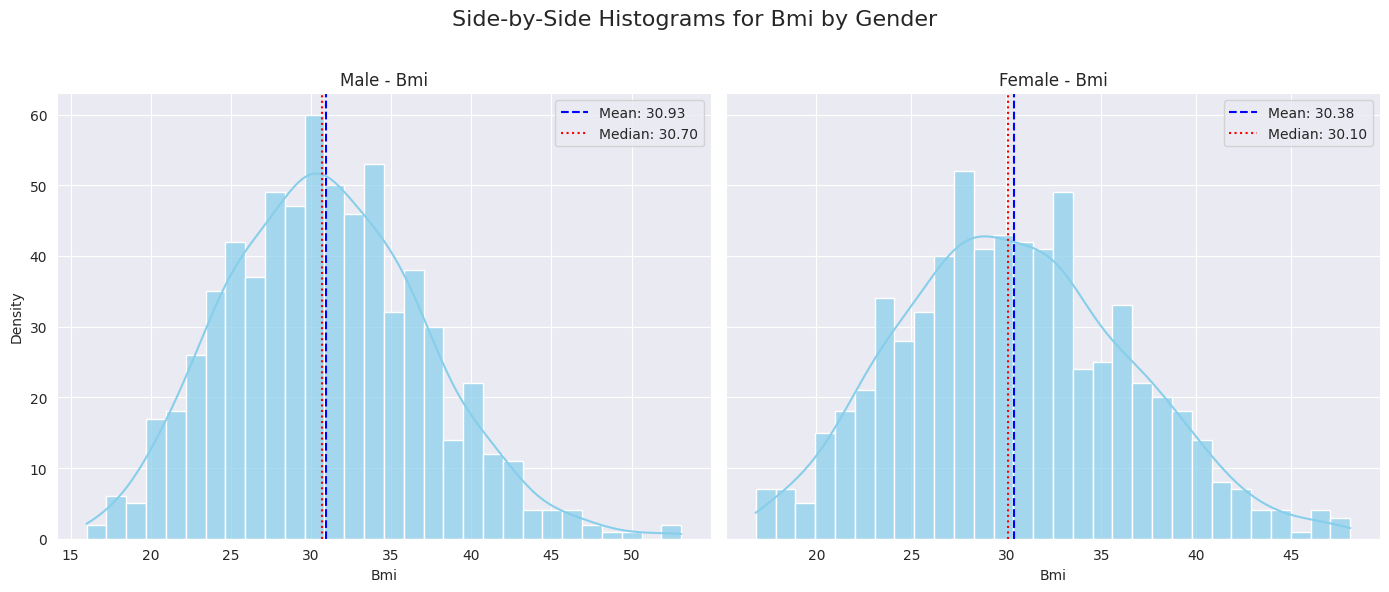

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


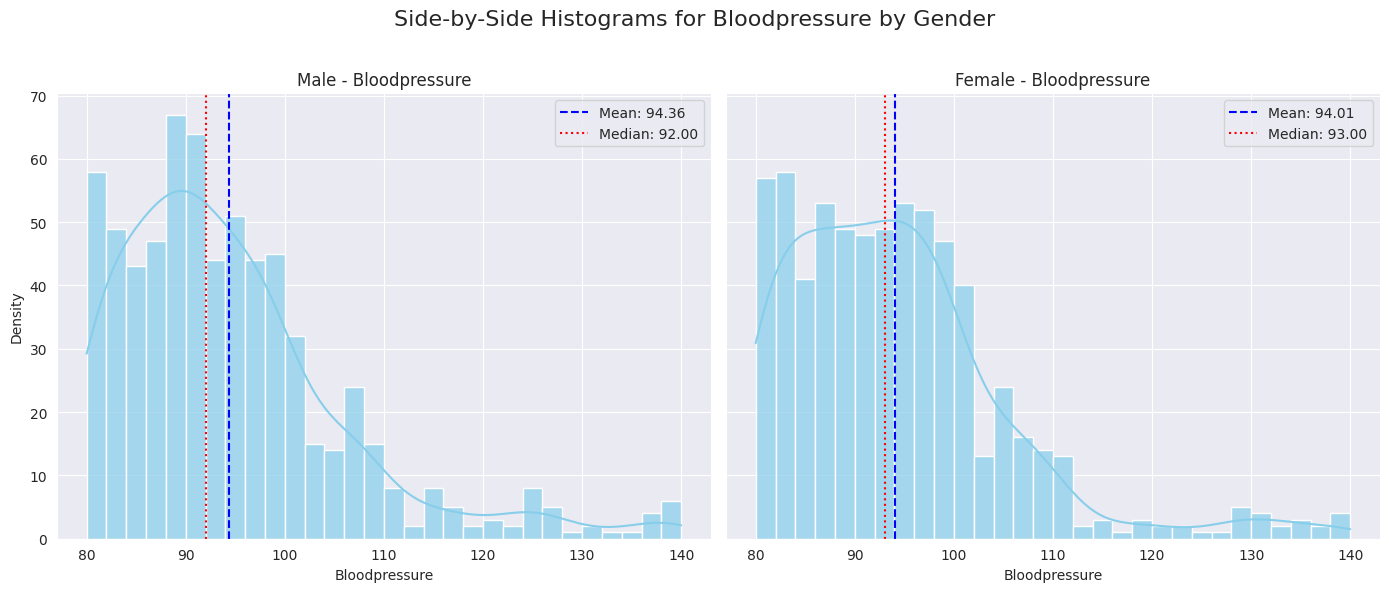

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


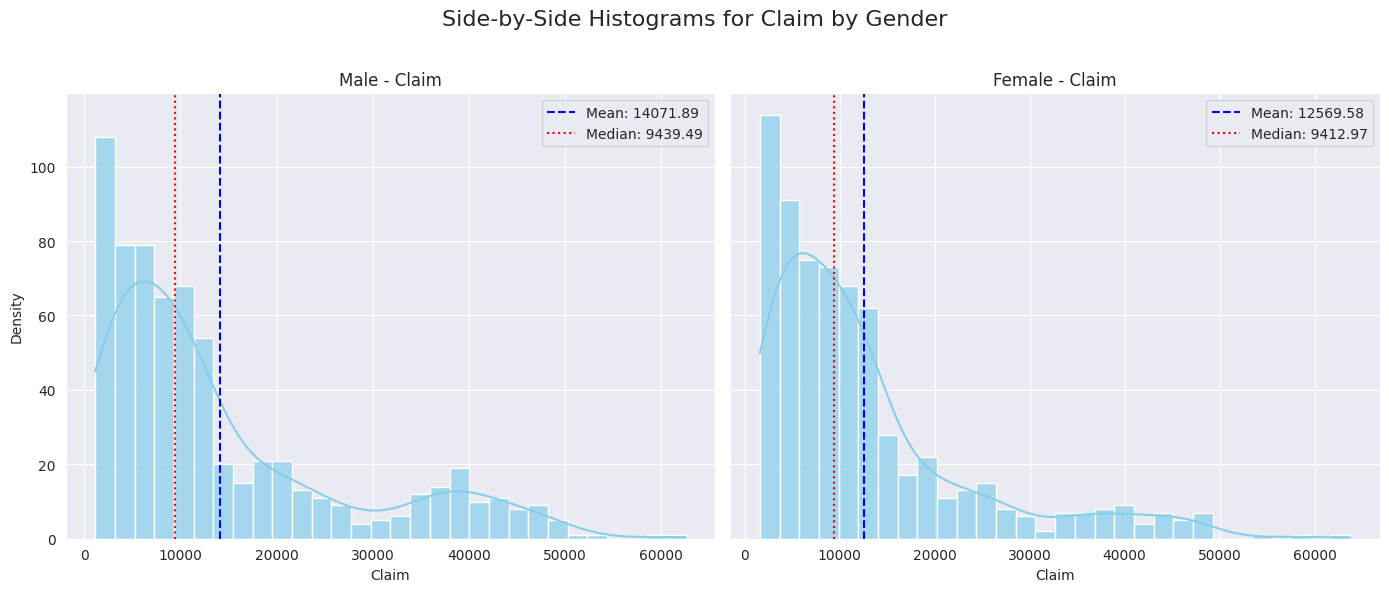


Insights:
- Summary statistics provide mean, median, and variability of numeric features by gender.
- Outlier analysis quantifies the count and percentage of extreme values for males and females.
- Overall Point-Biserial Correlation quantifies the relationship between gender and numeric features.
- Group-specific Point-Biserial Correlation provides insight into relationships within gender groups.
- Boxplots visualize the distribution of numeric features for male and female groups.
- Use p-values to assess the statistical significance of each correlation.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Variables to analyze
numeric_features = ['bmi', 'bloodpressure', 'claim']

# Ensure 'gender' and numeric features exist in the dataset
if 'gender' not in df.columns:
    raise ValueError("Feature 'gender' not found in the dataset.")
for feature in numeric_features:
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found in the dataset.")

# 1. Map 'gender' to numeric values
df['gender_numeric'] = df['gender'].map({'male': 0, 'female': 1})

# Check for missing values in gender_numeric
missing_gender_numeric = df['gender_numeric'].isnull().sum()
print(f"\nMissing Values in 'gender_numeric': {missing_gender_numeric}")

# Drop rows with missing gender_numeric for valid calculations
df_cleaned = df.dropna(subset=['gender_numeric'])

# 2. Summary Statistics: Gender vs Numeric Features
print("\nSummary Statistics:")
for feature in numeric_features:
    print(f"\nSummary Statistics for '{feature}' by Gender:")
    print(df.groupby('gender')[feature].describe())

# 3. Outlier Analysis Function
def outlier_analysis(df, group_col, numeric_col):
    """Calculate outlier counts and percentages for a numeric feature grouped by a categorical feature."""
    results = []
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group][numeric_col]
        Q1 = group_data.quantile(0.25)
        Q3 = group_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        total_count = group_data.count()
        outlier_count = group_data[(group_data < lower_bound) | (group_data > upper_bound)].count()
        outlier_percentage = (outlier_count / total_count * 100) if total_count > 0 else 0

        results.append({
            'Group': group,
            'Total Count': total_count,
            'Outlier Count': outlier_count,
            'Outlier Percentage': outlier_percentage
        })
    return pd.DataFrame(results)

# Perform outlier analysis for each numeric feature
print("\nOutlier Analysis:")
for feature in numeric_features:
    outlier_results = outlier_analysis(df, 'gender', feature)
    print(f"\nOutliers in '{feature}' by Gender:")
    print(outlier_results)

# 4. Overall Point-Biserial Correlation: Gender vs Numeric Features
print("\nPoint-Biserial Correlation: Overall (Gender vs Numeric Features)")
overall_results = []
for feature in numeric_features:
    subset = df_cleaned[['gender_numeric', feature]].dropna()
    
    if len(subset) < 2:  # Ensure sufficient data
        print(f"Insufficient data for overall correlation between gender and {feature}.")
        overall_results.append((feature, None, None))
        continue

    # Calculate Point-Biserial Correlation
    corr, p_value = pointbiserialr(subset['gender_numeric'], subset[feature])
    overall_results.append((feature, corr, p_value))
    print(f"Gender vs {feature}: Correlation={corr:.2f}, p-value={p_value:.4f}")

# Convert overall results into a DataFrame
overall_df = pd.DataFrame(overall_results, columns=["Feature", "Overall Correlation", "Overall p-value"])
print("\nOverall Correlation Summary:")
print(overall_df)

# 5. Group-Specific Point-Biserial Correlation
print("\nPoint-Biserial Correlation: Group-Specific (Male and Female)")
group_results = []

for group in ['male', 'female']:
    group_data = df_cleaned[df_cleaned['gender'] == group]
    print(f"\nGroup: {group.capitalize()} ({len(group_data)} rows)")

    for feature in numeric_features:
        subset = group_data[[feature]].dropna()
        
        if len(subset) < 2:  # Ensure sufficient data
            print(f"Insufficient data for correlation within group {group} for {feature}.")
            group_results.append((group, feature, None, None))
            continue

        # Calculate Point-Biserial Correlation
        corr, p_value = pointbiserialr(subset.index, subset[feature])  # Use row index to mimic binary group
        group_results.append((group, feature, corr, p_value))
        print(f"{group.capitalize()} vs {feature}: Correlation={corr:.2f}, p-value={p_value:.4f}")

# Convert group-specific results into a DataFrame
group_df = pd.DataFrame(group_results, columns=["Group", "Feature", "Group-Specific Correlation", "Group-Specific p-value"])
print("\nGroup-Specific Correlation Summary:")
print(group_df)

# 6. Visualization: Boxplots for Gender vs Numeric Features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='gender', y=feature, data=df_cleaned, palette='pastel')
    plt.title(f"Gender vs {feature.capitalize()}")
    plt.xlabel("Gender")
    plt.ylabel(feature.capitalize())
    plt.show()

# 7. Visualization: Side-by-Side Histograms for Gender vs Numeric Features
for feature in numeric_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    genders = df_cleaned['gender'].unique()
    for i, gender in enumerate(genders):
        # Subset data by gender
        subset = df_cleaned[df_cleaned['gender'] == gender][feature]
        
        # Plot histogram with KDE for the current gender
        sns.histplot(subset, kde=True, ax=axes[i], bins=30, color='skyblue', alpha=0.7)
        
        # Calculate mean and median
        mean_val = subset.mean()
        median_val = subset.median()
        
        # Add vertical lines for mean and median
        axes[i].axvline(mean_val, color='blue', linestyle='--', label=f"Mean: {mean_val:.2f}")
        axes[i].axvline(median_val, color='red', linestyle=':', label=f"Median: {median_val:.2f}")
        
        # Customize each subplot
        axes[i].set_title(f"{gender.capitalize()} - {feature.capitalize()}")
        axes[i].set_xlabel(feature.capitalize())
        axes[i].set_ylabel("Density")
        axes[i].legend()
    
    # Adjust layout and display the plot
    fig.suptitle(f"Side-by-Side Histograms for {feature.capitalize()} by Gender", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



# Insights
print("\nInsights:")
print("- Summary statistics provide mean, median, and variability of numeric features by gender.")
print("- Outlier analysis quantifies the count and percentage of extreme values for males and females.")
print("- Overall Point-Biserial Correlation quantifies the relationship between gender and numeric features.")
print("- Group-specific Point-Biserial Correlation provides insight into relationships within gender groups.")
print("- Boxplots visualize the distribution of numeric features for male and female groups.")
print("- Use p-values to assess the statistical significance of each correlation.")



Missing Values in 'diabetic_numeric': 0

Summary Statistics:

Summary Statistics for 'bmi' by Diabetic Status:
          count       mean       std   min    25%   50%    75%   max
diabetic                                                            
No        695.0  30.881439  6.107244  16.0  26.65  30.6  34.95  53.1
Yes       637.0  30.414914  6.127257  16.8  25.80  30.1  34.20  50.4

Summary Statistics for 'bloodpressure' by Diabetic Status:
          count       mean        std   min   25%   50%   75%    max
diabetic                                                            
No        695.0  94.300719  11.246527  80.0  86.0  93.0  99.0  140.0
Yes       637.0  94.067504  11.665685  80.0  86.0  92.0  99.0  140.0

Summary Statistics for 'claim' by Diabetic Status:
          count          mean           std      min       25%      50%  \
diabetic                                                                  
No        695.0  13406.602173  12275.678914  1131.51  4910.735  9301.89   

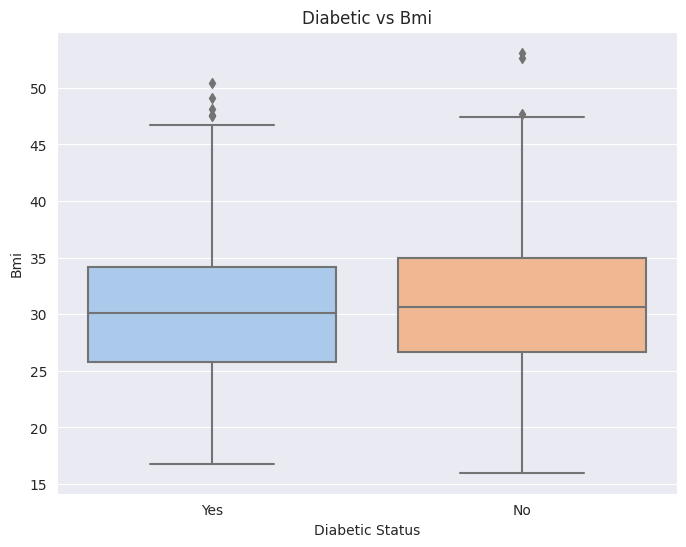

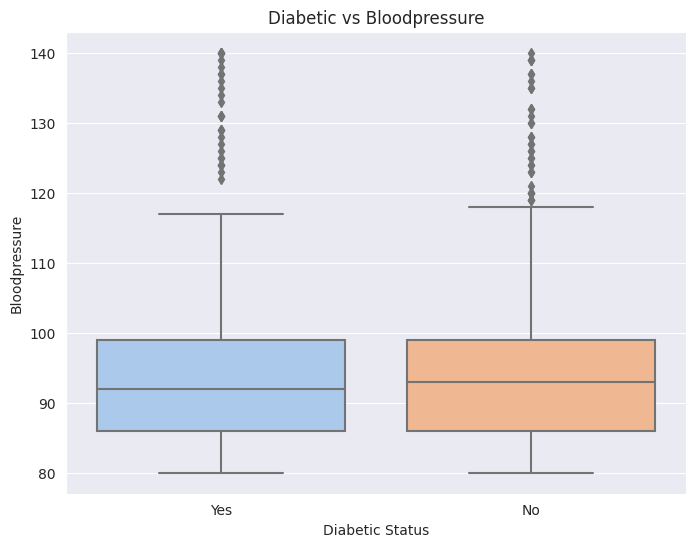

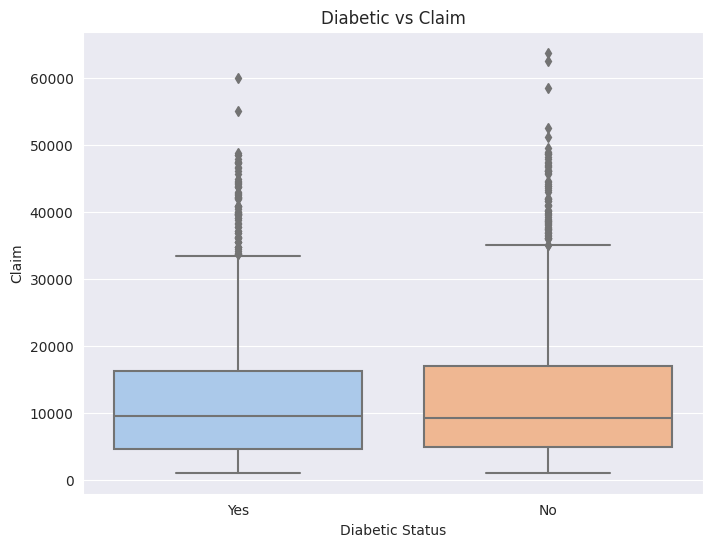

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


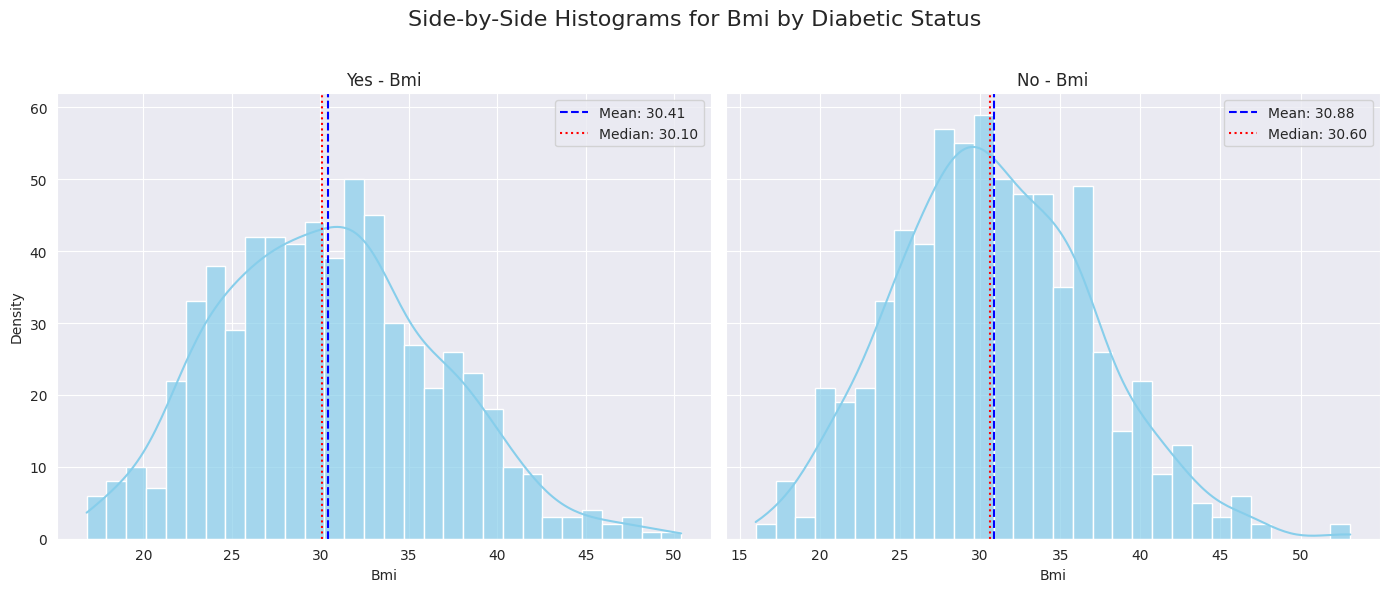

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


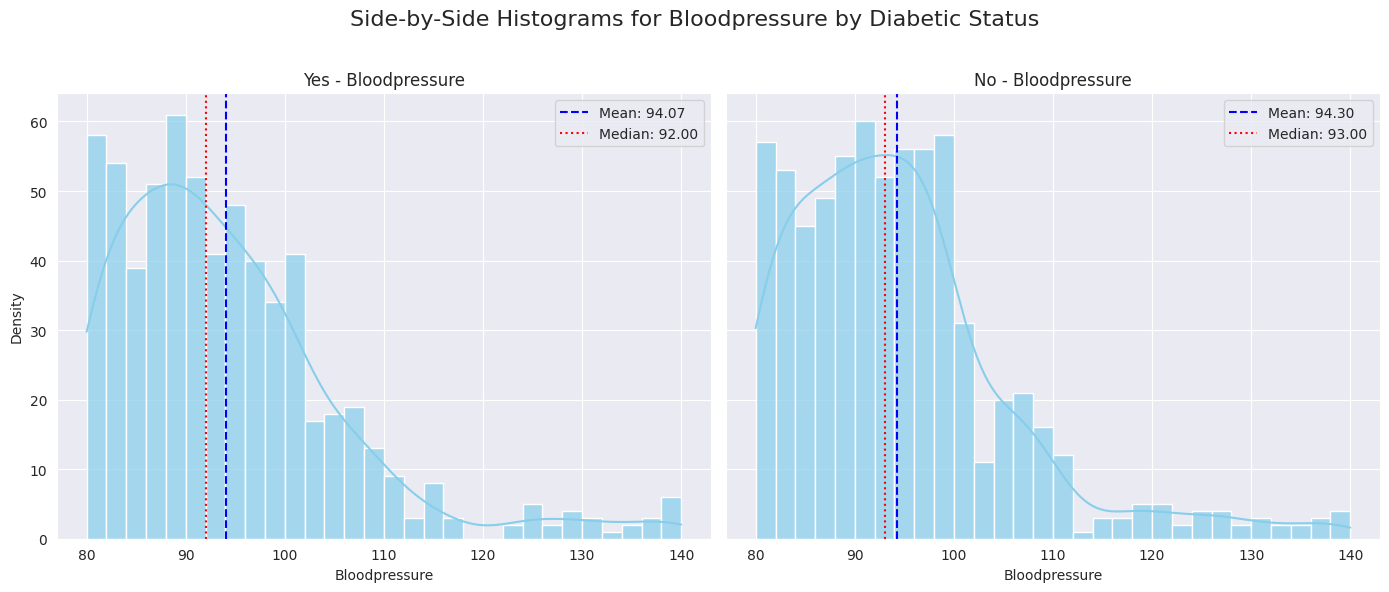

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


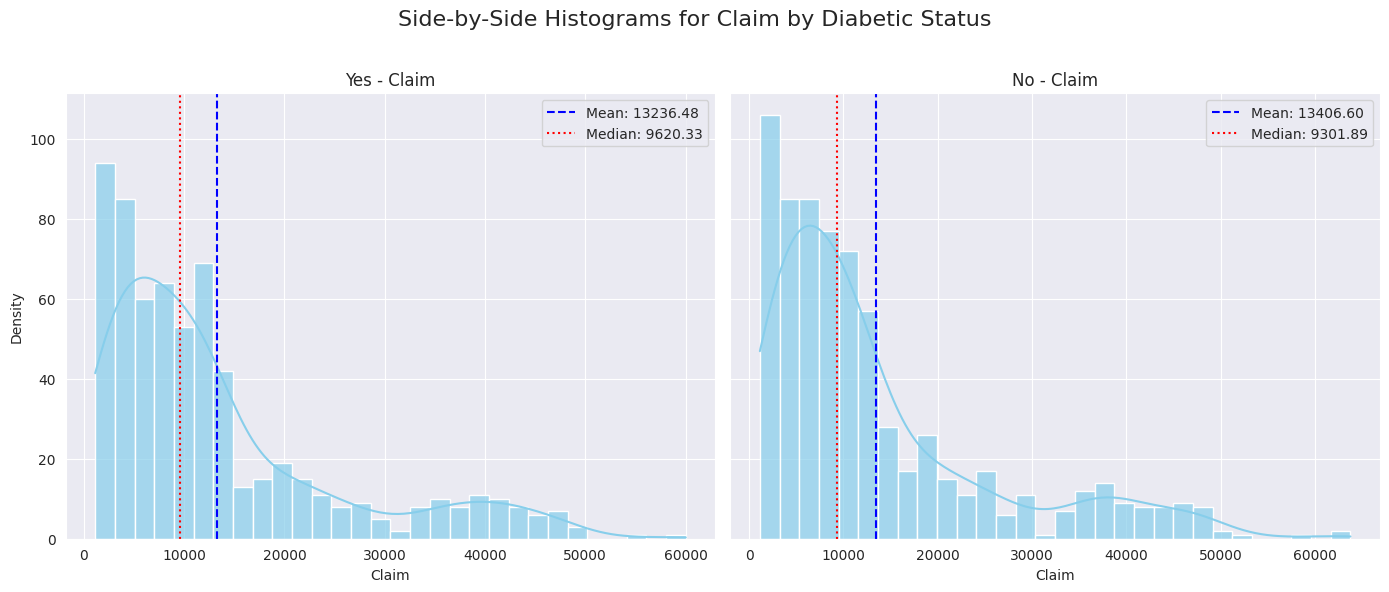


Insights:
- Summary statistics provide mean, median, and variability of numeric features by diabetic status.
- Outlier analysis quantifies the count and percentage of extreme values for diabetics and non-diabetics.
- Overall Point-Biserial Correlation quantifies the relationship between diabetic status and numeric features.
- Group-specific Point-Biserial Correlation provides insight into relationships within diabetic groups (Yes/No).
- Boxplots visualize the distribution of numeric features for diabetics and non-diabetics.
- Use p-values to assess the statistical significance of each correlation.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Variables to analyze
numeric_features = ['bmi', 'bloodpressure', 'claim']

# Ensure 'diabetic' and numeric features exist in the dataset
if 'diabetic' not in df.columns:
    raise ValueError("Feature 'diabetic' not found in the dataset.")
for feature in numeric_features:
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found in the dataset.")

# 1. Map 'diabetic' to numeric values
df['diabetic_numeric'] = df['diabetic'].map({'Yes': 1, 'No': 0})

# Check for missing values in diabetic_numeric
missing_diabetic_numeric = df['diabetic_numeric'].isnull().sum()
print(f"\nMissing Values in 'diabetic_numeric': {missing_diabetic_numeric}")

# Drop rows with missing diabetic_numeric for valid calculations
df_cleaned = df.dropna(subset=['diabetic_numeric'])

# 2. Summary Statistics: Diabetic vs Numeric Features
print("\nSummary Statistics:")
for feature in numeric_features:
    print(f"\nSummary Statistics for '{feature}' by Diabetic Status:")
    print(df.groupby('diabetic')[feature].describe())

# 3. Outlier Analysis Function
def outlier_analysis(df, group_col, numeric_col):
    """Calculate outlier counts and percentages for a numeric feature grouped by a categorical feature."""
    results = []
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group][numeric_col]
        Q1 = group_data.quantile(0.25)
        Q3 = group_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        total_count = group_data.count()
        outlier_count = group_data[(group_data < lower_bound) | (group_data > upper_bound)].count()
        outlier_percentage = (outlier_count / total_count * 100) if total_count > 0 else 0

        results.append({
            'Group': group,
            'Total Count': total_count,
            'Outlier Count': outlier_count,
            'Outlier Percentage': outlier_percentage
        })
    return pd.DataFrame(results)

# Perform outlier analysis for each numeric feature
print("\nOutlier Analysis:")
for feature in numeric_features:
    outlier_results = outlier_analysis(df, 'diabetic', feature)
    print(f"\nOutliers in '{feature}' by Diabetic Status:")
    print(outlier_results)

# 4. Overall Point-Biserial Correlation: Diabetic vs Numeric Features
print("\nPoint-Biserial Correlation: Overall (Diabetic vs Numeric Features)")
overall_results = []
for feature in numeric_features:
    subset = df_cleaned[['diabetic_numeric', feature]].dropna()
    
    if len(subset) < 2:  # Ensure sufficient data
        print(f"Insufficient data for overall correlation between diabetic and {feature}.")
        overall_results.append((feature, None, None))
        continue

    # Calculate Point-Biserial Correlation
    corr, p_value = pointbiserialr(subset['diabetic_numeric'], subset[feature])
    overall_results.append((feature, corr, p_value))
    print(f"Diabetic vs {feature}: Correlation={corr:.2f}, p-value={p_value:.4f}")

# Convert overall results into a DataFrame
overall_df = pd.DataFrame(overall_results, columns=["Feature", "Overall Correlation", "Overall p-value"])
print("\nOverall Correlation Summary:")
print(overall_df)

# 5. Group-Specific Point-Biserial Correlation
print("\nPoint-Biserial Correlation: Group-Specific (Yes and No)")
group_results = []

for group in ['Yes', 'No']:
    group_data = df_cleaned[df_cleaned['diabetic'] == group]
    print(f"\nGroup: {group.capitalize()} ({len(group_data)} rows)")

    for feature in numeric_features:
        subset = group_data[[feature]].dropna()
        
        if len(subset) < 2:  # Ensure sufficient data
            print(f"Insufficient data for correlation within group {group} for {feature}.")
            group_results.append((group, feature, None, None))
            continue

        # Calculate Point-Biserial Correlation
        corr, p_value = pointbiserialr(subset.index, subset[feature])  # Use row index to mimic binary group
        group_results.append((group, feature, corr, p_value))
        print(f"{group.capitalize()} vs {feature}: Correlation={corr:.2f}, p-value={p_value:.4f}")

# Convert group-specific results into a DataFrame
group_df = pd.DataFrame(group_results, columns=["Group", "Feature", "Group-Specific Correlation", "Group-Specific p-value"])
print("\nGroup-Specific Correlation Summary:")
print(group_df)

# 6. Visualization: Boxplots for Diabetic vs Numeric Features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diabetic', y=feature, data=df_cleaned, palette='pastel')
    plt.title(f"Diabetic vs {feature.capitalize()}")
    plt.xlabel("Diabetic Status")
    plt.ylabel(feature.capitalize())
    plt.show()

# 7. Visualization: Side-by-Side Histograms for Diabetic vs Numeric Features
for feature in numeric_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    diabetic_status = df_cleaned['diabetic'].unique()
    for i, status in enumerate(diabetic_status):
        # Subset data by diabetic status
        subset = df_cleaned[df_cleaned['diabetic'] == status][feature]
        
        # Plot histogram with KDE for the current status
        sns.histplot(subset, kde=True, ax=axes[i], bins=30, color='skyblue', alpha=0.7)
        
        # Calculate mean and median
        mean_val = subset.mean()
        median_val = subset.median()
        
        # Add vertical lines for mean and median
        axes[i].axvline(mean_val, color='blue', linestyle='--', label=f"Mean: {mean_val:.2f}")
        axes[i].axvline(median_val, color='red', linestyle=':', label=f"Median: {median_val:.2f}")
        
        # Customize each subplot
        axes[i].set_title(f"{status} - {feature.capitalize()}")
        axes[i].set_xlabel(feature.capitalize())
        axes[i].set_ylabel("Density")
        axes[i].legend()
    
    # Adjust layout and display the plot
    fig.suptitle(f"Side-by-Side Histograms for {feature.capitalize()} by Diabetic Status", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Insights
print("\nInsights:")
print("- Summary statistics provide mean, median, and variability of numeric features by diabetic status.")
print("- Outlier analysis quantifies the count and percentage of extreme values for diabetics and non-diabetics.")
print("- Overall Point-Biserial Correlation quantifies the relationship between diabetic status and numeric features.")
print("- Group-specific Point-Biserial Correlation provides insight into relationships within diabetic groups (Yes/No).")
print("- Boxplots visualize the distribution of numeric features for diabetics and non-diabetics.")
print("- Use p-values to assess the statistical significance of each correlation.")



Summary Statistics:

Summary Statistics for 'bmi' by 'children':
          count       mean       std   min     25%    50%     75%   max
children                                                               
0         568.0  30.535563  6.087771  16.0  26.000  30.30  34.825  53.1
1         324.0  30.623765  6.099888  16.8  26.600  30.00  34.225  52.6
2         240.0  30.979167  6.509965  16.8  25.775  31.65  35.350  48.1
3         157.0  30.688535  5.787143  18.9  27.300  30.50  34.300  46.5
4          25.0  31.388000  4.629824  24.4  28.200  29.60  33.700  41.5
5          18.0  29.600000  7.145463  18.3  24.300  28.55  33.025  46.8

Summary Statistics for 'bloodpressure' by 'children':
          count       mean        std   min    25%   50%   75%    max
children                                                             
0         568.0  94.258803  11.814032  80.0  86.00  92.0  99.0  140.0
1         324.0  94.506173  11.019401  80.0  87.00  93.0  99.0  139.0
2         240.0  94.662

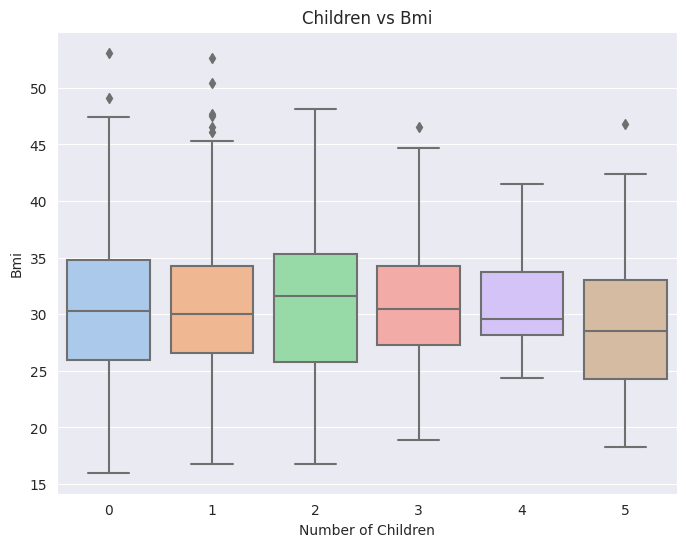

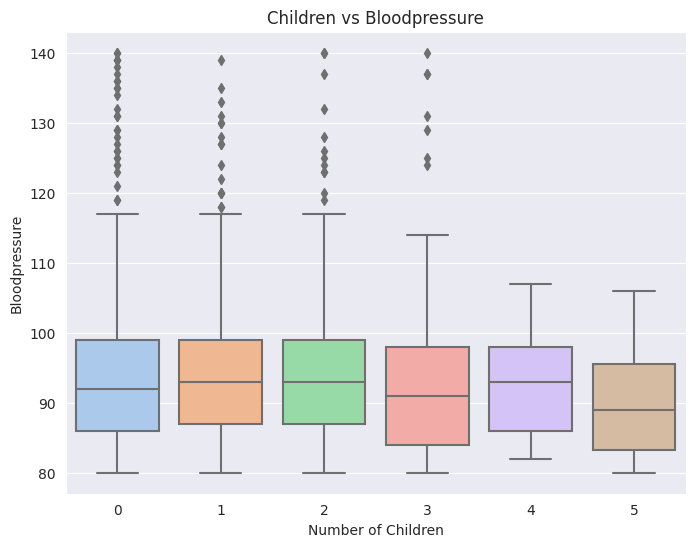

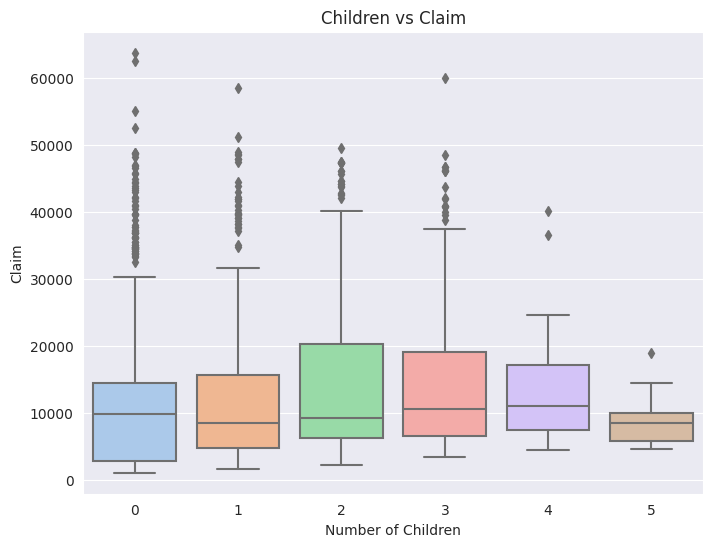

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

# List of numeric features to analyze
numeric_features = ['bmi', 'bloodpressure', 'claim']

# Ensure 'children' and numeric features exist in the dataset
if 'children' not in df.columns:
    raise ValueError("Required column 'children' not found in the dataset.")
for feature in numeric_features:
    if feature not in df.columns:
        raise ValueError(f"Required numeric feature '{feature}' not found in the dataset.")

# 1. Summary Statistics: Children vs Numeric Features
print("\nSummary Statistics:")
for feature in numeric_features:
    print(f"\nSummary Statistics for '{feature}' by 'children':")
    print(df.groupby('children')[feature].describe())

# 2. Outlier Analysis Function
def outlier_analysis(df, group_col, numeric_col):
    """Calculate outlier counts and percentages for a numeric feature grouped by a categorical feature."""
    results = []
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group][numeric_col]
        Q1 = group_data.quantile(0.25)
        Q3 = group_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        total_count = group_data.count()
        outlier_count = group_data[(group_data < lower_bound) | (group_data > upper_bound)].count()
        outlier_percentage = (outlier_count / total_count * 100) if total_count > 0 else 0

        results.append({
            'Children Group': group,
            'Total Count': total_count,
            'Outlier Count': outlier_count,
            'Outlier Percentage': outlier_percentage
        })
    return pd.DataFrame(results)

# Perform Outlier Analysis
print("\nOutlier Analysis:")
for feature in numeric_features:
    print(f"\nOutlier Analysis for '{feature}' by 'children':")
    outlier_results = outlier_analysis(df, 'children', feature)
    print(outlier_results)

# 3. Kruskal-Wallis H Test: Children vs Numeric Features
print("\nKruskal-Wallis H Test: Children vs Numeric Features")
kruskal_results = []
for feature in numeric_features:
    # Group data by 'children'
    groups = [df[df['children'] == val][feature].dropna() for val in df['children'].unique()]
    
    # Perform Kruskal-Wallis H Test
    h_stat, p_value = kruskal(*groups)
    kruskal_results.append((feature, h_stat, p_value))
    print(f"Kruskal-Wallis H Test Results for {feature} by 'children': H-statistic={h_stat:.2f}, p-value={p_value:.4f}")

# Convert Kruskal-Wallis results into a DataFrame for a summary table
kruskal_df = pd.DataFrame(kruskal_results, columns=["Feature", "H-statistic", "p-value"])
print("\nKruskal-Wallis H Test Summary:")
print(kruskal_df)

# 4. Visualization: Boxplots for Children vs Numeric Features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='children', y=feature, data=df, palette='pastel')
    plt.title(f"Children vs {feature.capitalize()}")
    plt.xlabel("Number of Children")
    plt.ylabel(feature.capitalize())
    plt.show()


In [26]:
pip install scikit-posthocs


Note: you may need to restart the kernel to use updated packages.



Kruskal-Wallis H Test for 'claim' by 'children': H-statistic=27.3503, p-value=0.0000
Significant differences detected among the groups (p < 0.05). Proceeding with post-hoc tests...


Dunn's Test Results (Bonferroni-Adjusted P-values) for 'claim' by 'children':
          1         2         3         4         5    6
1  1.000000  1.000000  0.005390  0.000593  0.766413  1.0
2  1.000000  1.000000  0.185367  0.022321  1.000000  1.0
3  0.005390  0.185367  1.000000  1.000000  1.000000  1.0
4  0.000593  0.022321  1.000000  1.000000  1.000000  1.0
5  0.766413  1.000000  1.000000  1.000000  1.000000  1.0
6  1.000000  1.000000  1.000000  1.000000  1.000000  1.0

Effect Size (Epsilon-squared) for 'claim' by 'children': 0.0205
Effect Size Interpretation:
- Small effect: ~0.01
- Medium effect: ~0.06
- Large effect: ~0.14



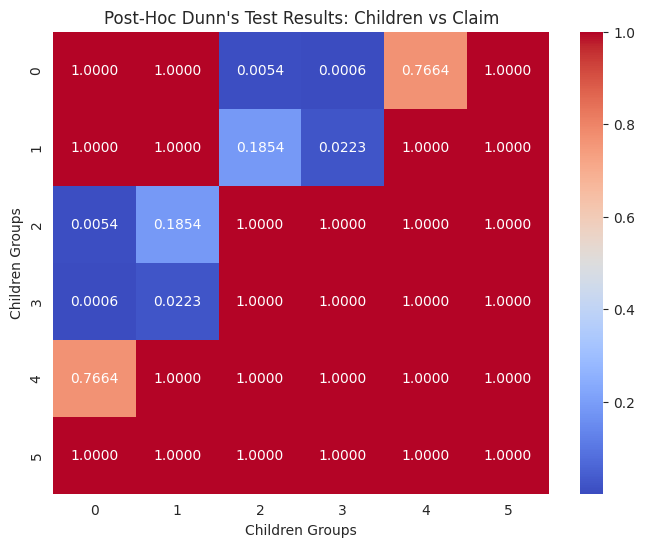


Summary Statistics for 'claim' by 'children':
             median          mean           std  count      min       max
children                                                                 
0          9872.745  12484.987923  12030.479564    568  1121.87  63770.43
1          8483.870  12731.171821  11823.631341    324  1711.03  58571.07
2          9264.980  15073.564000  12891.368314    240  2304.00  49577.66
3         10600.550  15355.318535  12330.869474    157  3443.06  60021.40
4         11033.660  13850.656800   9139.223594     25  4504.66  40182.25
5          8589.565   8786.035556   3808.434648     18  4687.80  19023.26


In [27]:
import scikit_posthocs as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# 1. Recompute Kruskal-Wallis H Test for Confirmation
# Extract groups for 'claim' based on 'children'
groups_claim = [df[df['children'] == val]['claim'].dropna() for val in df['children'].unique()]

# Perform Kruskal-Wallis H Test
h_stat, p_value = kruskal(*groups_claim)
print(f"\nKruskal-Wallis H Test for 'claim' by 'children': H-statistic={h_stat:.4f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("Significant differences detected among the groups (p < 0.05). Proceeding with post-hoc tests...\n")
else:
    print("No significant differences detected (p >= 0.05). Post-hoc tests are not necessary.\n")
    exit()

# 2. Non-Parametric Post-Hoc Tests: Dunn's Test
# Perform Dunn's test with Bonferroni adjustment
dunn_results = sp.posthoc_dunn(groups_claim, p_adjust='bonferroni')

# Output Dunn's Test Results
print("\nDunn's Test Results (Bonferroni-Adjusted P-values) for 'claim' by 'children':")
print(dunn_results)

# Save Dunn's Test Results to CSV (optional, for further inspection)
dunn_results.to_csv("dunn_test_results_claim_children.csv", index=True)

# 3. Effect Size Measurement: Epsilon-squared
def calculate_epsilon_squared(h_stat, total_sample_size):
    """
    Calculate epsilon-squared effect size for the Kruskal-Wallis H test.
    """
    return h_stat / (total_sample_size - 1)

# Calculate epsilon-squared effect size
total_sample_size = len(df['claim'].dropna())
epsilon_squared = calculate_epsilon_squared(h_stat, total_sample_size)

print(f"\nEffect Size (Epsilon-squared) for 'claim' by 'children': {epsilon_squared:.4f}")
print("Effect Size Interpretation:")
print("- Small effect: ~0.01")
print("- Medium effect: ~0.06")
print("- Large effect: ~0.14\n")

# 4. Visualization: Dunn's Test Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dunn_results, annot=True, fmt=".4f", cmap="coolwarm",
            xticklabels=df['children'].unique(), yticklabels=df['children'].unique())
plt.title("Post-Hoc Dunn's Test Results: Children vs Claim")
plt.xlabel("Children Groups")
plt.ylabel("Children Groups")
plt.show()

# 5. Summary Report
# Include group-wise median, IQR, and other statistics for better interpretability
summary_stats = df.groupby('children')['claim'].agg(['median', 'mean', 'std', 'count', 'min', 'max'])
print("\nSummary Statistics for 'claim' by 'children':")
print(summary_stats)

# Save summary statistics to CSV (optional)
summary_stats.to_csv("summary_statistics_claim_children.csv", index=True)



Missing Values in 'smoker_numeric': 0

Summary Statistics:

Summary Statistics for 'bmi' by Smoker Status:
         count       mean       std   min     25%    50%   75%   max
smoker                                                              
No      1058.0  30.644140  6.068574  16.0  26.225  30.30  34.4  53.1
Yes      274.0  30.713139  6.320840  17.2  26.100  30.45  35.2  52.6

Summary Statistics for 'bloodpressure' by Smoker Status:
         count        mean        std   min   25%    50%    75%    max
smoker                                                                
No      1058.0   91.755198   8.346652  80.0  85.0   91.0   97.0  140.0
Yes      274.0  103.587591  16.040516  80.0  91.0  101.0  114.0  140.0

Summary Statistics for 'claim' by Smoker Status:
         count          mean           std       min        25%        50%  \
smoker                                                                       
No      1058.0   8475.864537   5985.190362   1121.87   4034.320   73

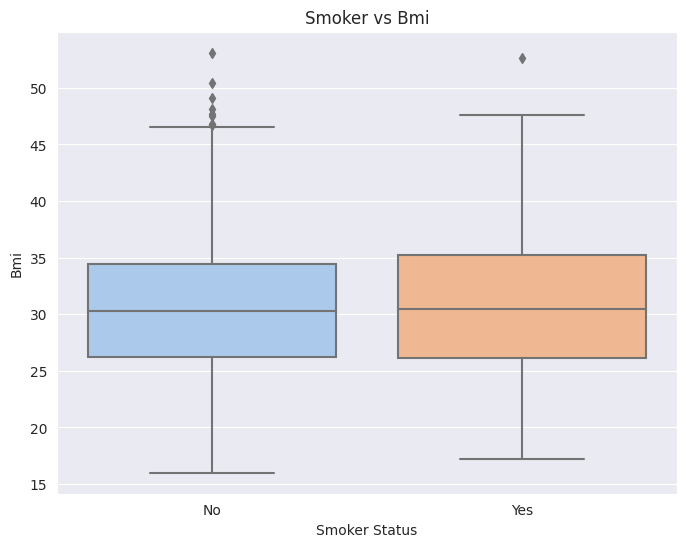

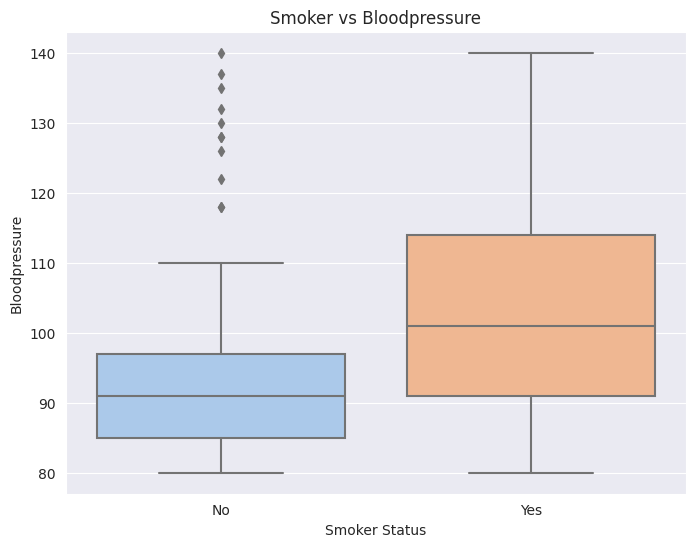

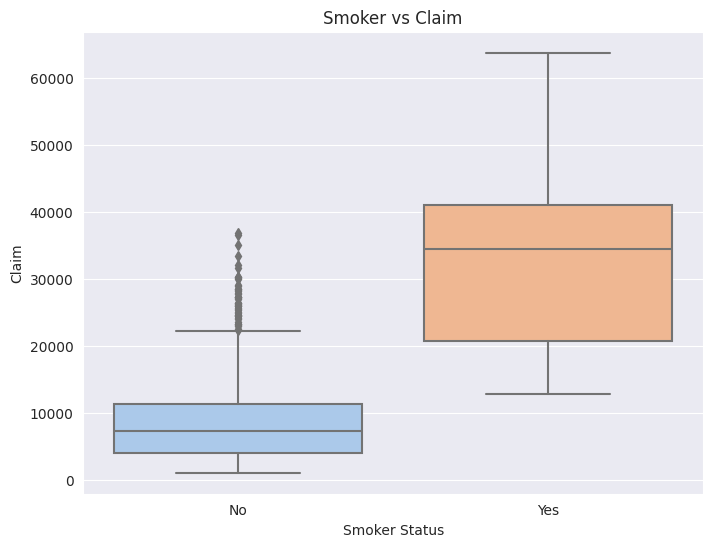

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


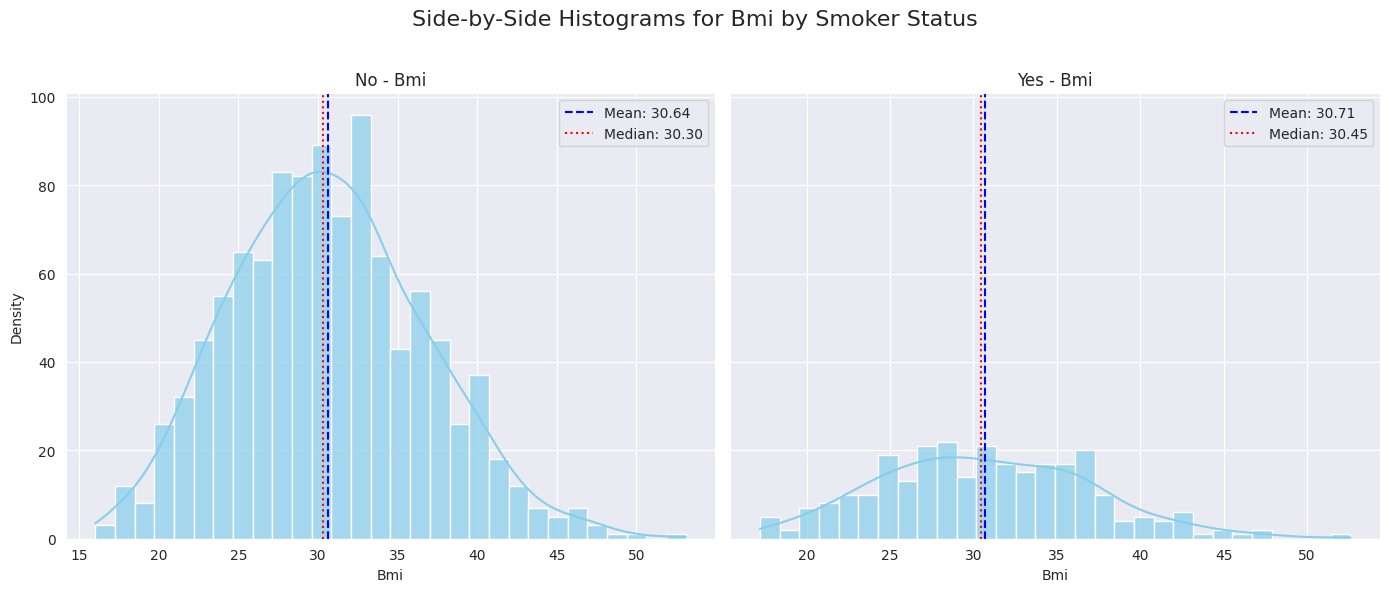

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


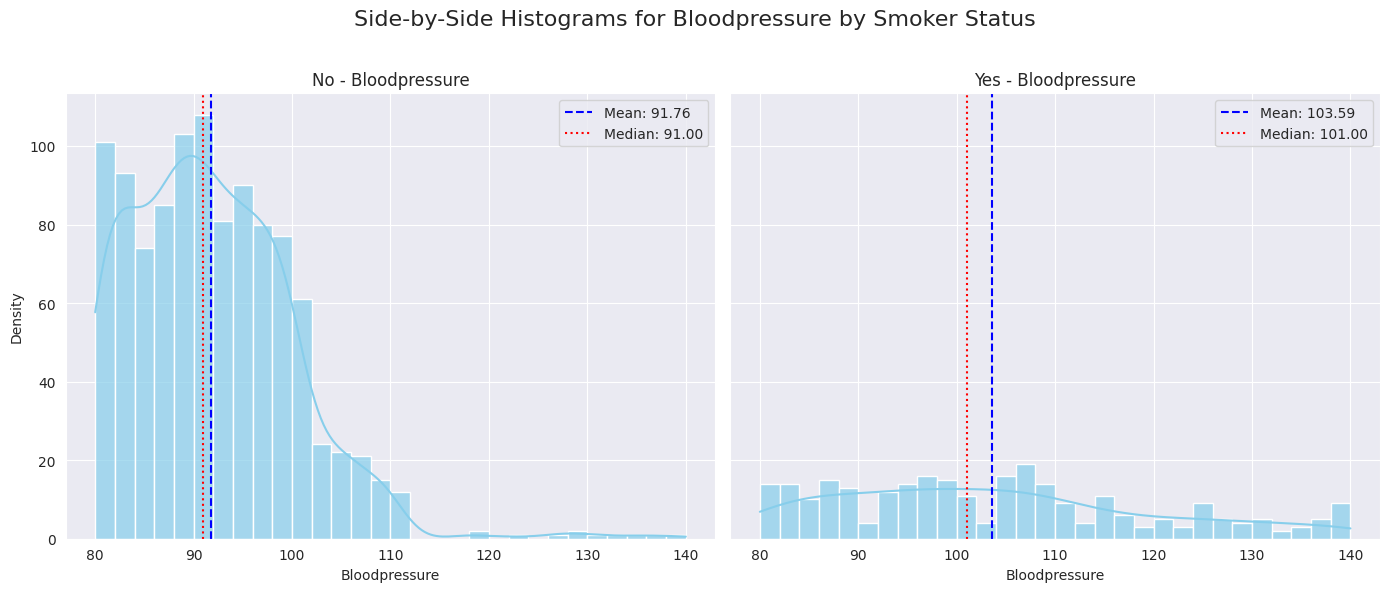

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


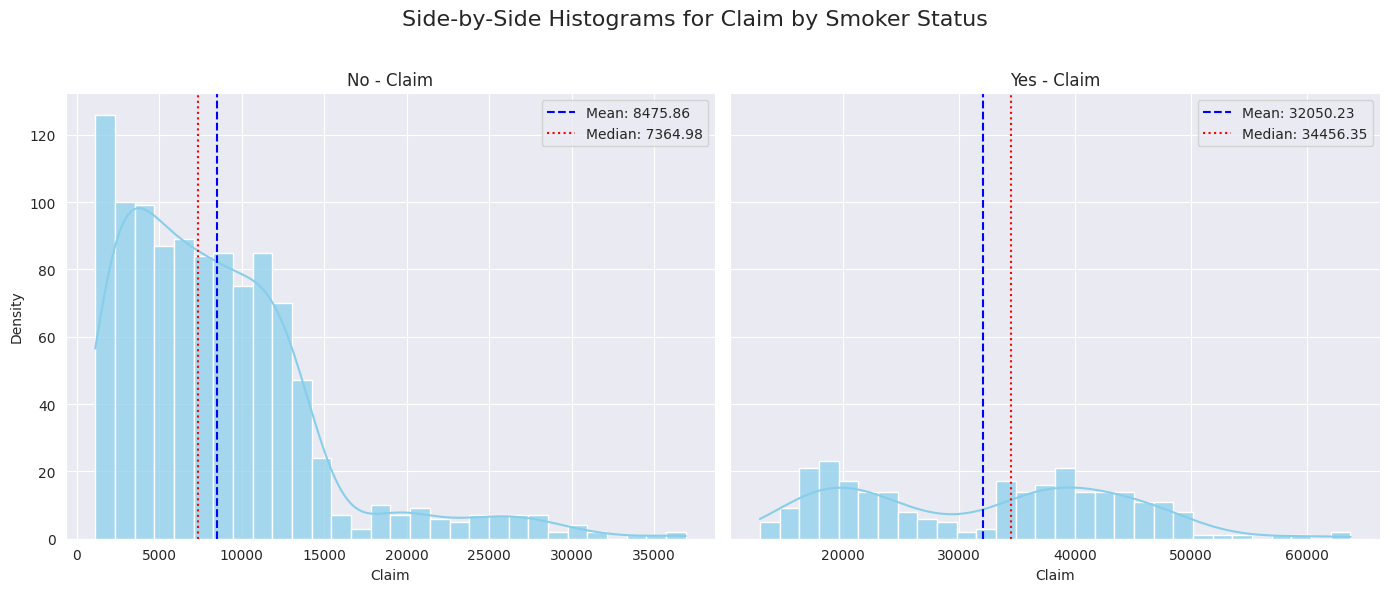


Insights:
- Summary statistics provide mean, median, and variability of numeric features by smoker status.
- Outlier analysis quantifies the count and percentage of extreme values for smokers vs. non-smokers.
- Point-Biserial Correlation quantifies the linear relationship between smoker status and numeric features.
- Boxplots visualize the distribution of numeric features across smoker categories ('Yes' and 'No').
- Use p-values from Point-Biserial tests to assess statistical significance.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Variables to analyze
numeric_features = ['bmi', 'bloodpressure', 'claim']

# Ensure 'smoker' and numeric features exist in the dataset
if 'smoker' not in df.columns:
    raise ValueError("Feature 'smoker' not found in the dataset.")
for feature in numeric_features:
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found in the dataset.")

# Map 'smoker' to numeric values: 1 for 'Yes', 0 for 'No'
df['smoker_numeric'] = df['smoker'].map({'Yes': 1, 'No': 0})

# Check for missing values after mapping
missing_smoker_numeric = df['smoker_numeric'].isnull().sum()
print(f"\nMissing Values in 'smoker_numeric': {missing_smoker_numeric}")

# 1. Summary Statistics: Smoker vs Numeric Features
print("\nSummary Statistics:")
for feature in numeric_features:
    print(f"\nSummary Statistics for '{feature}' by Smoker Status:")
    print(df.groupby('smoker')[feature].describe())

# 2. Outlier Analysis
def outlier_analysis(df, group_col, numeric_col):
    """Calculate outlier counts and percentages for a numeric feature grouped by a categorical feature."""
    results = []
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group][numeric_col]
        Q1 = group_data.quantile(0.25)
        Q3 = group_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        total_count = group_data.count()
        outlier_count = group_data[(group_data < lower_bound) | (group_data > upper_bound)].count()
        outlier_percentage = (outlier_count / total_count * 100) if total_count > 0 else 0

        results.append({
            'Group': group,
            'Total Count': total_count,
            'Outlier Count': outlier_count,
            'Outlier Percentage': outlier_percentage
        })
    return pd.DataFrame(results)

# Perform outlier analysis for each numeric feature
print("\nOutlier Analysis:")
for feature in numeric_features:
    outlier_results = outlier_analysis(df, 'smoker', feature)
    print(f"\nOutliers in '{feature}' by Smoker Status:")
    print(outlier_results)

# 3. Point-Biserial Correlation
print("\nPoint-Biserial Correlation Coefficient:")
point_biserial_results = []
for feature in numeric_features:
    subset = df[['smoker_numeric', feature]].dropna()
    
    # Ensure sufficient data
    if len(subset) < 2:
        print(f"Insufficient data for correlation between smoker and {feature}.")
        point_biserial_results.append((feature, None, None))
        continue

    # Calculate Point-Biserial Correlation
    corr, p_value = pointbiserialr(subset['smoker_numeric'], subset[feature])
    point_biserial_results.append((feature, corr, p_value))
    print(f"Smoker vs {feature}: Correlation={corr:.2f}, p-value={p_value:.4f}")

# Convert results into a DataFrame
point_biserial_df = pd.DataFrame(point_biserial_results, columns=["Feature", "Point-Biserial Correlation", "p-value"])
print("\nPoint-Biserial Correlation Summary:")
print(point_biserial_df)

# 4. Visualization: Boxplots for Smoker vs Numeric Features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='smoker', y=feature, data=df, palette='pastel')
    plt.title(f"Smoker vs {feature.capitalize()}")
    plt.xlabel("Smoker Status")
    plt.ylabel(feature.capitalize())
    plt.show()

# 5. Visualization: Side-by-Side Histograms for Smoker vs Numeric Features
for feature in numeric_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    smoker_status = df['smoker'].unique()
    for i, status in enumerate(smoker_status):
        # Subset data by smoker status
        subset = df[df['smoker'] == status][feature]
        
        # Plot histogram with KDE for the current status
        sns.histplot(subset, kde=True, ax=axes[i], bins=30, color='skyblue', alpha=0.7)
        
        # Calculate mean and median
        mean_val = subset.mean()
        median_val = subset.median()
        
        # Add vertical lines for mean and median
        axes[i].axvline(mean_val, color='blue', linestyle='--', label=f"Mean: {mean_val:.2f}")
        axes[i].axvline(median_val, color='red', linestyle=':', label=f"Median: {median_val:.2f}")
        
        # Customize each subplot
        axes[i].set_title(f"{status.capitalize()} - {feature.capitalize()}")
        axes[i].set_xlabel(feature.capitalize())
        axes[i].set_ylabel("Density")
        axes[i].legend()
    
    # Adjust layout and display the plot
    fig.suptitle(f"Side-by-Side Histograms for {feature.capitalize()} by Smoker Status", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Insights
print("\nInsights:")
print("- Summary statistics provide mean, median, and variability of numeric features by smoker status.")
print("- Outlier analysis quantifies the count and percentage of extreme values for smokers vs. non-smokers.")
print("- Point-Biserial Correlation quantifies the linear relationship between smoker status and numeric features.")
print("- Boxplots visualize the distribution of numeric features across smoker categories ('Yes' and 'No').")
print("- Use p-values from Point-Biserial tests to assess statistical significance.")



Summary Statistics:

Summary Statistics for 'bmi' by Region:
           count       mean       std   min    25%    50%     75%   max
region                                                                 
northeast  231.0  29.363203  5.967782  16.0  24.95  29.60  33.300  48.1
northwest  345.0  29.202319  5.429821  17.4  25.60  28.90  32.800  53.1
southeast  442.0  32.387104  6.578022  16.8  27.70  32.05  37.100  52.6
southwest  314.0  30.777389  5.645261  17.4  27.10  30.50  34.775  47.6

Summary Statistics for 'bloodpressure' by Region:
           count       mean        std   min    25%   50%    75%    max
region                                                                 
northeast  231.0  95.722944  13.328992  80.0  85.00  94.0  102.0  140.0
northwest  345.0  92.994203  10.125088  80.0  86.00  91.0   98.0  139.0
southeast  442.0  94.398190  11.481812  80.0  87.00  93.0   99.0  140.0
southwest  314.0  94.079618  11.166044  80.0  86.25  92.0   99.0  140.0

Summary Statistics for

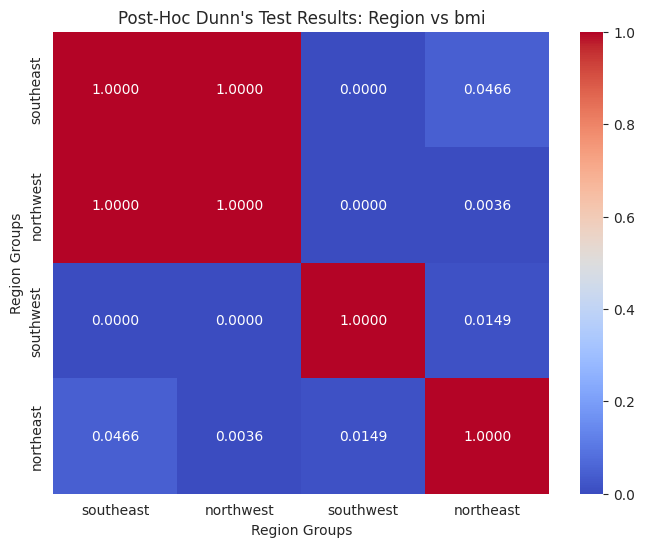


bloodpressure: Kruskal-Wallis H-statistic=4.55, p-value=0.2078

claim: Kruskal-Wallis H-statistic=62.45, p-value=0.0000
Significant differences detected for 'claim'. Performing post-hoc analysis...
Dunn's Test Results for 'claim':
              northeast     northwest     southeast     southwest
northeast  1.000000e+00  9.418682e-12  5.321304e-12  7.312733e-08
northwest  9.418682e-12  1.000000e+00  1.000000e+00  1.000000e+00
southeast  5.321304e-12  1.000000e+00  1.000000e+00  1.000000e+00
southwest  7.312733e-08  1.000000e+00  1.000000e+00  1.000000e+00


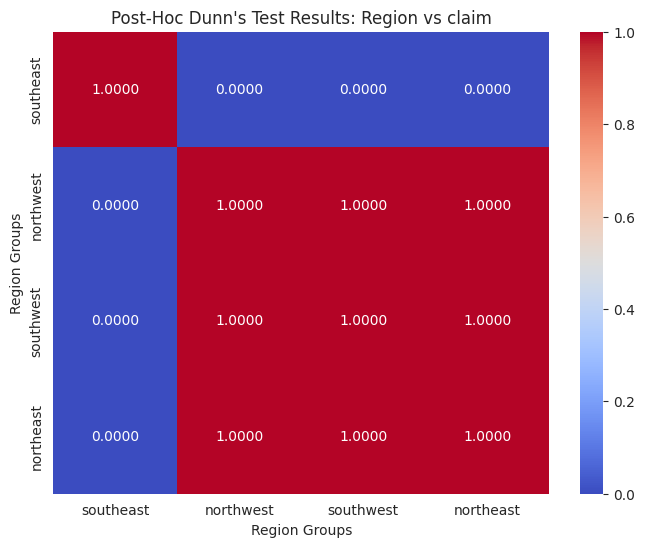


Kruskal-Wallis Test Summary:
         Feature  Kruskal-Wallis Statistic       p-value
0            bmi                 57.371762  2.140674e-12
1  bloodpressure                  4.550968  2.077889e-01
2          claim                 62.451522  1.759260e-13


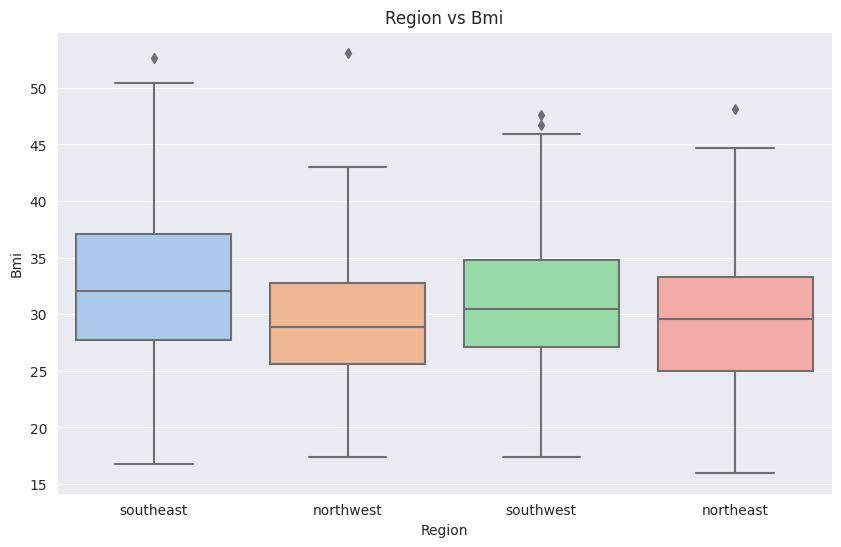

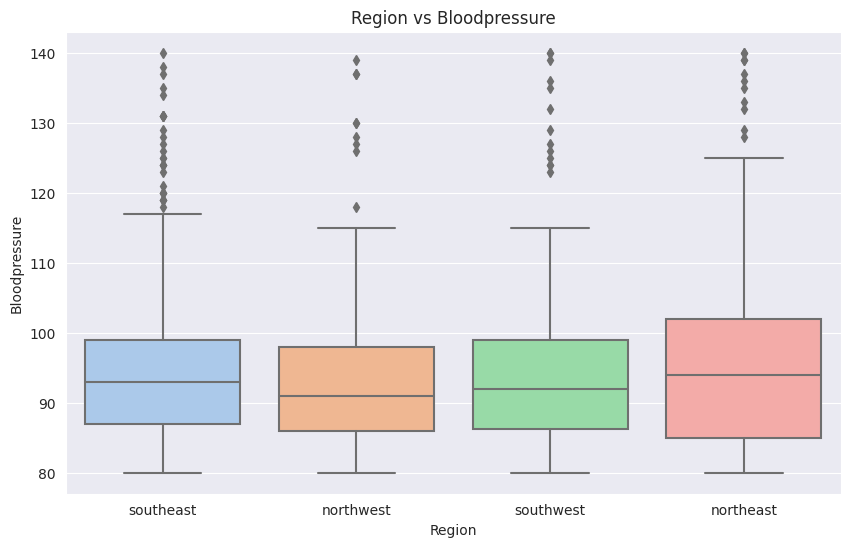

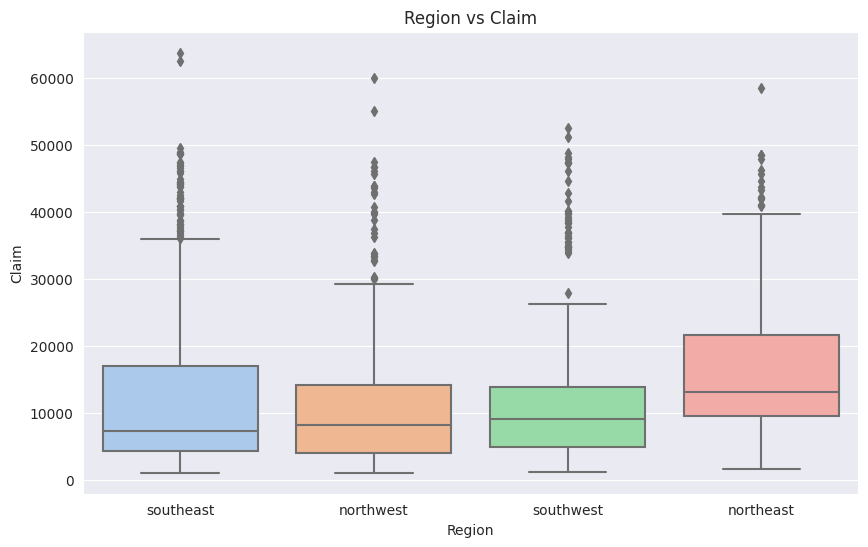


Insights:
- Summary statistics provide mean, median, and variability of numeric features by region.
- Outlier analysis quantifies the count and percentage of extreme values for each region.
- Kruskal-Wallis H Test assesses whether the numeric features differ significantly across regions.
- Post-hoc tests identify which specific regions differ when Kruskal-Wallis indicates significance.
- Boxplots visualize the distribution of numeric features for each region.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
import scikit_posthocs as sp  # Ensure this is installed with `pip install scikit-posthocs`

# Variables to analyze
numeric_features = ['bmi', 'bloodpressure', 'claim']

# Ensure 'region' and numeric features exist in the dataset
if 'region' not in df.columns:
    raise ValueError("Feature 'region' not found in the dataset.")
for feature in numeric_features:
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found in the dataset.")

# 1. Summary Statistics: Region vs Numeric Features
print("\nSummary Statistics:")
for feature in numeric_features:
    print(f"\nSummary Statistics for '{feature}' by Region:")
    print(df.groupby('region')[feature].describe())

# 2. Outlier Analysis Function
def outlier_analysis(df, group_col, numeric_col):
    """Calculate outlier counts and percentages for a numeric feature grouped by a categorical feature."""
    results = []
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group][numeric_col]
        Q1 = group_data.quantile(0.25)
        Q3 = group_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        total_count = group_data.count()
        outlier_count = group_data[(group_data < lower_bound) | (group_data > upper_bound)].count()
        outlier_percentage = (outlier_count / total_count * 100) if total_count > 0 else 0

        results.append({
            'Region': group,
            'Total Count': total_count,
            'Outlier Count': outlier_count,
            'Outlier Percentage': outlier_percentage
        })
    return pd.DataFrame(results)

# Perform outlier analysis for each numeric feature
print("\nOutlier Analysis:")
for feature in numeric_features:
    outlier_results = outlier_analysis(df, 'region', feature)
    print(f"\nOutliers in '{feature}' by Region:")
    print(outlier_results)

# 3. Kruskal-Wallis H Test: Region vs Numeric Features
print("\nKruskal-Wallis H Test and Post-Hoc Analysis:")
kruskal_results = []
for feature in numeric_features:
    # Collect data for each group
    region_groups = [df[df['region'] == region][feature].dropna() for region in df['region'].unique()]
    
    # Perform Kruskal-Wallis H Test
    if all(len(group) > 1 for group in region_groups):  # Ensure all groups have sufficient data
        statistic, p_value = kruskal(*region_groups)
        kruskal_results.append((feature, statistic, p_value))
        print(f"\n{feature}: Kruskal-Wallis H-statistic={statistic:.2f}, p-value={p_value:.4f}")
        
        # If significant, perform post-hoc test
        if p_value < 0.05:
            print(f"Significant differences detected for '{feature}'. Performing post-hoc analysis...")
            # Prepare data for Dunn's test
            data = df[['region', feature]].dropna()
            dunn_results = sp.posthoc_dunn(data, val_col=feature, group_col='region', p_adjust='bonferroni')
            
            # Display Dunn's Test Results
            print(f"Dunn's Test Results for '{feature}':")
            print(dunn_results)

            # Visualize Dunn's Test Results
            plt.figure(figsize=(8, 6))
            sns.heatmap(dunn_results, annot=True, fmt=".4f", cmap="coolwarm",
                        xticklabels=df['region'].unique(), yticklabels=df['region'].unique())
            plt.title(f"Post-Hoc Dunn's Test Results: Region vs {feature}")
            plt.xlabel("Region Groups")
            plt.ylabel("Region Groups")
            plt.show()
    else:
        print(f"Insufficient data for Kruskal-Wallis test for '{feature}'.")
        kruskal_results.append((feature, None, None))

# Convert Kruskal-Wallis results into a DataFrame
kruskal_df = pd.DataFrame(kruskal_results, columns=["Feature", "Kruskal-Wallis Statistic", "p-value"])
print("\nKruskal-Wallis Test Summary:")
print(kruskal_df)

# 4. Visualization: Boxplots for Region vs Numeric Features
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='region', y=feature, data=df, palette='pastel')
    plt.title(f"Region vs {feature.capitalize()}")
    plt.xlabel("Region")
    plt.ylabel(feature.capitalize())
    plt.show()

# Insights
print("\nInsights:")
print("- Summary statistics provide mean, median, and variability of numeric features by region.")
print("- Outlier analysis quantifies the count and percentage of extreme values for each region.")
print("- Kruskal-Wallis H Test assesses whether the numeric features differ significantly across regions.")
print("- Post-hoc tests identify which specific regions differ when Kruskal-Wallis indicates significance.")
print("- Boxplots visualize the distribution of numeric features for each region.")



--- Analyzing Relationship Between 'gender' and 'region' ---

Contingency Table:
region  northeast  northwest  southeast  southwest
gender                                            
female        112        164        224        162
male          119        181        218        152

Chi-Square Test Results:
Chi-Square Statistic: 1.40
Degrees of Freedom: 3
p-value: 0.7051
Conclusion: No statistically significant association between 'gender' and 'region'.


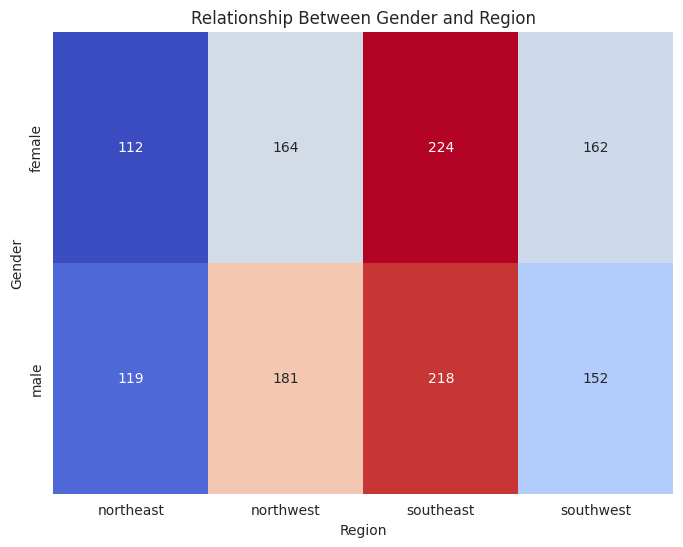


--- Analyzing Relationship Between 'diabetic' and 'region' ---

Contingency Table:
region    northeast  northwest  southeast  southwest
diabetic                                            
No              110        190        225        170
Yes             121        155        217        144

Chi-Square Test Results:
Chi-Square Statistic: 3.85
Degrees of Freedom: 3
p-value: 0.2777
Conclusion: No statistically significant association between 'diabetic' and 'region'.


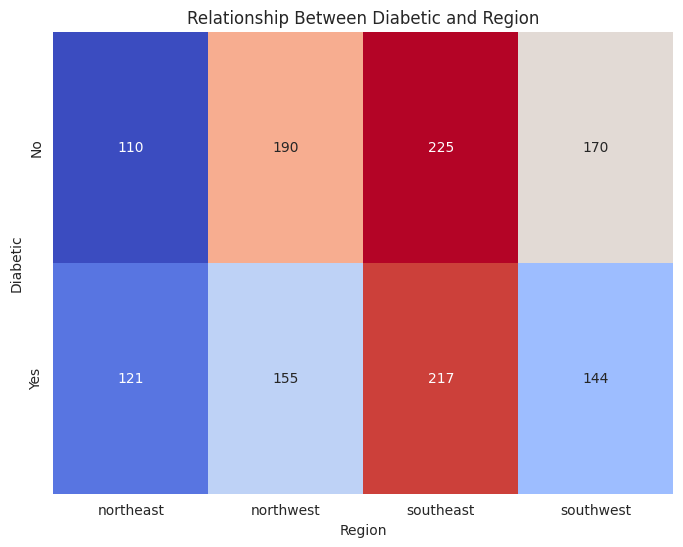


--- Analyzing Relationship Between 'smoker' and 'region' ---

Contingency Table:
region  northeast  northwest  southeast  southwest
smoker                                            
No            164        287        351        256
Yes            67         58         91         58

Chi-Square Test Results:
Chi-Square Statistic: 13.89
Degrees of Freedom: 3
p-value: 0.0031
Conclusion: There is a statistically significant association between 'smoker' and 'region'.


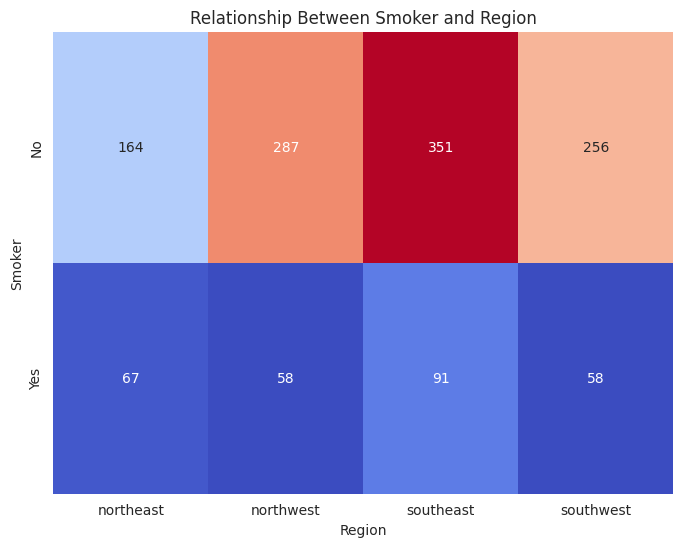

In [30]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all required features exist in the dataset
categorical_pairs = [
    ('gender', 'region'),
    ('diabetic', 'region'),
    ('smoker', 'region')
]

for col1, col2 in categorical_pairs:
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError(f"One or both features '{col1}' and '{col2}' not found in the dataset.")

# Function to compute a contingency table, Chi-Square Test, and visualize the relationship
def analyze_categorical_relationship(df, col1, col2):
    print(f"\n--- Analyzing Relationship Between '{col1}' and '{col2}' ---")

    # 1. Contingency Table
    contingency_table = pd.crosstab(df[col1], df[col2])
    print(f"\nContingency Table:\n{contingency_table}")

    # 2. Chi-Square Test of Independence
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print("\nChi-Square Test Results:")
    print(f"Chi-Square Statistic: {chi2:.2f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"p-value: {p_value:.4f}")

    # Interpretation of the Chi-Square Test
    if p_value < 0.05:
        print(f"Conclusion: There is a statistically significant association between '{col1}' and '{col2}'.")
    else:
        print(f"Conclusion: No statistically significant association between '{col1}' and '{col2}'.")

    # 3. Visualization: Heatmap of Contingency Table
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", cbar=False)
    plt.title(f"Relationship Between {col1.capitalize()} and {col2.capitalize()}")
    plt.xlabel(col2.capitalize())
    plt.ylabel(col1.capitalize())
    plt.show()

# Perform analysis for each pair
for col1, col2 in categorical_pairs:
    analyze_categorical_relationship(df, col1, col2)

